In [8]:
# from fiteanalytics.finx.client import FinXClient
# import sys
# sys.path.append('~/sdk')
from finx.client import FinXClient
import pandas as pd
import numpy as np
pd.options.plotting.backend = "plotly"

In [9]:
fincad_api_key = '46c85416-f9c3-4bf9-aa1a-a0e5788dfca6'
finx_api_endpoint = 'http://52.34.48.102/api/' # FITE ANALYTICS DEVELOPMENT SERVER
# finx_api_endpoint = 'https://sandbox.finx.io/api/'
finx = FinXClient('socket', finx_api_key=fincad_api_key, finx_api_endpoint=finx_api_endpoint)

Connecting to ws://52.34.48.102/ws/api/
Authenticating...
Successfully authenticated


# Long Future

VaR = {'VaR': -10.612162387116271, 'option_side': None, 'strike_price': -9999, 'par_value': 100.0, 'price': 68.2, 'filenames': ['FINX_66384b49-38fc-4ecc-bebd-865d35ddfcc5_prices.csv', 'FINX_66384b49-38fc-4ecc-bebd-865d35ddfcc5_gbm.csv', 'FINX_66384b49-38fc-4ecc-bebd-865d35ddfcc5_rates.csv']}


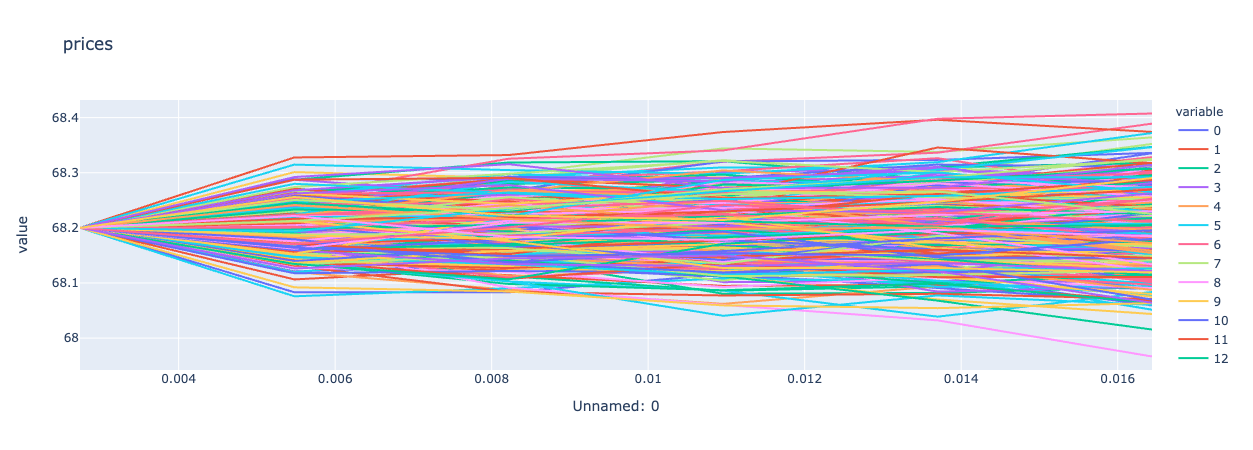

[None]

In [10]:
num_shares = 100.
market_value = 68.2
finx.clear_cache()
long_future = finx._dispatch(
    'calculate_VaR', 
    security_id='COX1 Comdty',
    as_of_date='20210630',
    principal_amount=num_shares, 
    market_value=market_value,
    horizon_params=dict(days=6))
print(f'VaR = {long_future}')
dataframes = [finx._download_file(dict(filename=filename, bucket_name='cms-portfolio-uploads')) for filename in long_future['filenames']]
[df.set_index('Unnamed: 0').plot(title=long_future["filenames"][i].split("_")[-1].replace(".csv", "")).show() for i, df in enumerate(dataframes[:1])]

VaR = -25.70253318980868


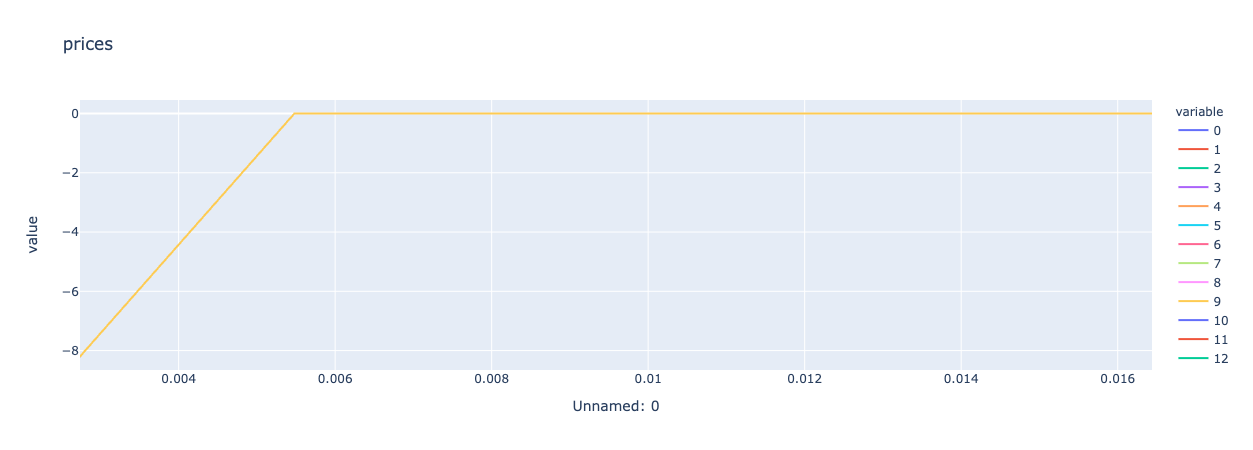

[None]

Socket on_error: Connection is already closed.
Connecting to ws://52.34.48.102/ws/api/
Socket closed
Socket on_error: Connection is already closed.
Connecting to ws://52.34.48.102/ws/api/
Socket closed
Socket on_error: Handshake status 502 Bad Gateway
Connecting to ws://52.34.48.102/ws/api/
Socket closed
Socket on_error: Handshake status 502 Bad Gateway
Connecting to ws://52.34.48.102/ws/api/
Socket closed
Socket on_error: Handshake status 502 Bad Gateway
Connecting to ws://52.34.48.102/ws/api/
Socket closed
Socket on_error: Handshake status 502 Bad Gateway
Connecting to ws://52.34.48.102/ws/api/
Socket closed
Socket on_error: Handshake status 502 Bad Gateway
Connecting to ws://52.34.48.102/ws/api/
Socket closed
Socket on_error: Handshake status 502 Bad Gateway
Connecting to ws://52.34.48.102/ws/api/
Socket closed
Socket on_error: Handshake status 502 Bad Gateway
Connecting to ws://52.34.48.102/ws/api/
Socket closed
Socket on_error: Handshake status 502 Bad Gateway
Connecting to ws://5

In [12]:
finx.clear_cache()
long_call = finx._dispatch(
    'calculate_VaR', 
    security_id='GCQ1P1800.0Comdty',
    as_of_date='20210720', 
    principal_amount=100,
    market_value=11.8,
    underlying_value=1810.,
    horizon_params=dict(days=6))
print(f'VaR = {long_call["VaR"]}')
dataframes = [finx._download_file(dict(filename=filename, bucket_name='cms-portfolio-uploads')) for filename in long_call['filenames'][:1]]
[df.set_index('Unnamed: 0').plot(title=long_call["filenames"][i].split("_")[-1].replace(".csv", "")).show() for i, df in enumerate(dataframes[:1])]

# Long Call on Future

In [ ]:
num_options = 100.
price = 20.
finx.clear_cache()
long_call = finx._dispatch(
    'calculate_VaR', 
    security_id='COX1C50.0Comdty',
    as_of_date='20210630', 
    principal_amount=num_options,
    market_value=price,
    underlying_value=market_value,
    horizon_params=dict(days=6))
print(f'VaR = {long_call["VaR"]}')
dataframes = [finx._download_file(dict(filename=filename, bucket_name='cms-portfolio-uploads')) for filename in long_call['filenames'][:1]]
[df.set_index('Unnamed: 0').plot(title=long_call["filenames"][i].split("_")[-1].replace(".csv", "")).show() for i, df in enumerate(dataframes[:1])]

# Short Call on Future

In [ ]:
num_options = -100.
price = 0.2
short_call = finx._dispatch(
    'calculate_VaR', 
    security_id='COX1C68.2Comdty',
    as_of_date='20210630',
    principal_amount=num_options,
    market_value=price,
    underlying_value=market_value,
    horizon_params=dict(years=1))
print(f'VaR = {short_call["VaR"]}')
dataframes = [finx._download_file(dict(filename=filename, bucket_name='cms-portfolio-uploads')) for filename in short_call['filenames']]
[df.set_index('Unnamed: 0').plot(title=short_call["filenames"][i].split("_")[-1].replace(".csv", "")).show() for i, df in enumerate(dataframes)]

# Long Put on Future

In [ ]:
num_options = 100.
price = 0.2
long_put = finx._dispatch(
    'calculate_VaR',
    security_id='COX1P68.2Comdty',
    as_of_date='20210630', 
    principal_amount=num_options,
    market_value=price,
    underlying_value=market_value,
    horizon_params=dict(years=1))
print(f'VaR = {long_put["VaR"]}')
dataframes = [finx._download_file(dict(filename=filename, bucket_name='cms-portfolio-uploads')) for filename in long_put['filenames']]
[df.set_index('Unnamed: 0').plot(title=long_put["filenames"][i].split("_")[-1].replace(".csv", "")).show() for i, df in enumerate(dataframes)]

# Short Put on Future

In [ ]:
num_options = -100.0
price = 0.2
finx.clear_cache()
short_put = finx._dispatch(
    'calculate_VaR', 
    security_id='COX1P68.2Comdty',
    as_of_date='20210630', 
    principal_amount=num_options,
    market_value=price,
    underlying_value=market_value,
    horizon_params=dict(years=1))
print(f'VaR = {short_put["VaR"]}')
dataframes = [finx._download_file(dict(filename=filename, bucket_name='cms-portfolio-uploads')) for filename in short_put['filenames']]
[df.set_index('Unnamed: 0').plot(title=short_put["filenames"][i].split("_")[-1].replace(".csv", "")).show() for i, df in enumerate(dataframes)]

In [ ]:
dataframes[0] -= 23.625
dataframes[0].plot()

In [ ]:
(dataframes[0].set_index('Unnamed: 0')[:1] * -1).hist()

In [ ]:
np.percentile((dataframes[0].set_index('Unnamed: 0')[:1] * -1), 5) * 100

In [ ]:
finx.clear_cache()
short_put = finx._dispatch(
    'calculate_VaR', 
    security_id='CQ1P550.0Comdty',
    as_of_date='20210720', 
    principal_amount=100,
    market_value=23.625,
    underlying_value=572,
    horizon_params=dict(years=1))
print(f'VaR = {short_put["VaR"]}')
dataframes = [finx._download_file(dict(filename=filename, bucket_name='cms-portfolio-uploads')) for filename in short_put['filenames']]
[df.set_index('Unnamed: 0').plot(title=short_put["filenames"][i].split("_")[-1].replace(".csv", "")).show() for i, df in enumerate(dataframes)]